In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
pip install Sastrawi

     |████████████████████████████████| 209 kB 190 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
sentence = 'Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan'
output   = stemmer.stem(sentence)
print(output)
# ekonomi indonesia sedang dalam tumbuh yang banggaprint(stemmer.stem('Mereka meniru-nirukannya'))
# mereka tiru


ekonomi indonesia sedang dalam tumbuh yang bangga


In [4]:
kalimat = "Berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia."
lower_case = kalimat.lower()
print(lower_case)# output
# berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah korea selatan, jepang, singapura, hong kong, dan finlandia.


berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah korea selatan, jepang, singapura, hong kong, dan finlandia.


In [5]:
import re # impor modul regular expression
kalimat = "Berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia."
hasil = re.sub(r"\d+", "", kalimat)
print(hasil)# ouput
# Berikut ini adalah negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia.


Berikut ini adalah  negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia.


In [11]:
import re
def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        
        return document

In [12]:
preprocess_text(kalimat)

'ini adalah contoh kalimat dengan tanda baca '

In [13]:
kalimat = "rumah idaman adalah rumah yang bersih"
pisah = kalimat.split()
print(pisah)# output
# ['rumah', 'idaman', 'adalah', 'rumah', 'yang', 'bersih']


['rumah', 'idaman', 'adalah', 'rumah', 'yang', 'bersih']


In [15]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [17]:
# impor word_tokenize dari modul nltk
import nltk
from nltk.tokenize import word_tokenize 
 
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online."
 
tokens = nltk.tokenize.word_tokenize(kalimat)
print(tokens)# ouput 
# ['Andi', 'kerap', 'melakukan', 'transaksi', 'rutin', 'secara', 'daring', 'atau', 'online', '.']


['Andi', 'kerap', 'melakukan', 'transaksi', 'rutin', 'secara', 'daring', 'atau', 'online', '.']


In [25]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans('','')).lower()
 
tokens = nltk.tokenize.word_tokenize(kalimat)
kemunculan = nltk.FreqDist(tokens)
print(kemunculan.most_common())# 


[('andi', 2), ('online', 2), ('.', 2), ('kerap', 1), ('melakukan', 1), ('transaksi', 1), ('rutin', 1), ('secara', 1), ('daring', 1), ('atau', 1), ('menurut', 1), ('belanja', 1), ('lebih', 1), ('praktis', 1), ('&', 1), ('murah', 1)]


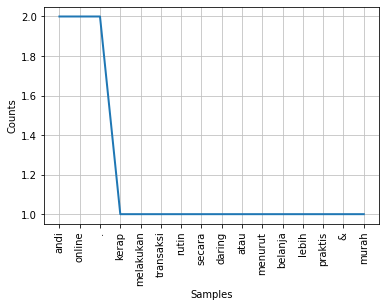

In [21]:
import matplotlib.pyplot as plt
kemunculan.plot(30,cumulative=False)
plt.show()


In [ ]:
# TfidfVectorizer 
# CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd
# set of documents
train = ['The sky is blue.','The sun is bright.']
test = ['The sun in the sky is bright', 'We can see the shining sun, the bright sun.']
# instantiate the vectorizer object
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
# convert th documents into a matrix
count_wm = countvectorizer.fit_transform(train)
tfidf_wm = tfidfvectorizer.fit_transform(train)
#retrieve the terms found in the corpora
# if we take same parameters on both Classes(CountVectorizer and TfidfVectorizer) , it will give same output of get_feature_names() methods)
#count_tokens = tfidfvectorizer.get_feature_names() # no difference
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_countvect = pd.DataFrame(data = count_wm.toarray(),index = ['Doc1','Doc2'],columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = ['Doc1','Doc2'],columns = tfidf_tokens)
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)
